# Decisión Tree


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('processed.cleveland.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.dtypes


,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [7]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [9]:
len(df.loc[(df['ca']=='?') | (df['thal']=='?')])

6

In [10]:
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
len(df)

303

In [12]:
df = df.loc[(df['ca']!='?') & (df['thal']!='?')]

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [14]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [16]:
X = df.drop('hd', axis=1)
y = df['hd']

In [19]:
X.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [23]:
X_encoded = pd.get_dummies(X, columns=['cp',  'restecg', 'slope',
                                       'thal'])

In [24]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [25]:
y.unique()

array([0, 2, 1, 3, 4])

In [26]:
y_encoded = y.apply(lambda x: 0 if x==0 else 1)

In [27]:
y_encoded.unique()

array([0, 1])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [29]:
clf_dt = DecisionTreeClassifier(random_state=42)

In [30]:
clf_dt = clf_dt.fit(X_train, y_train)

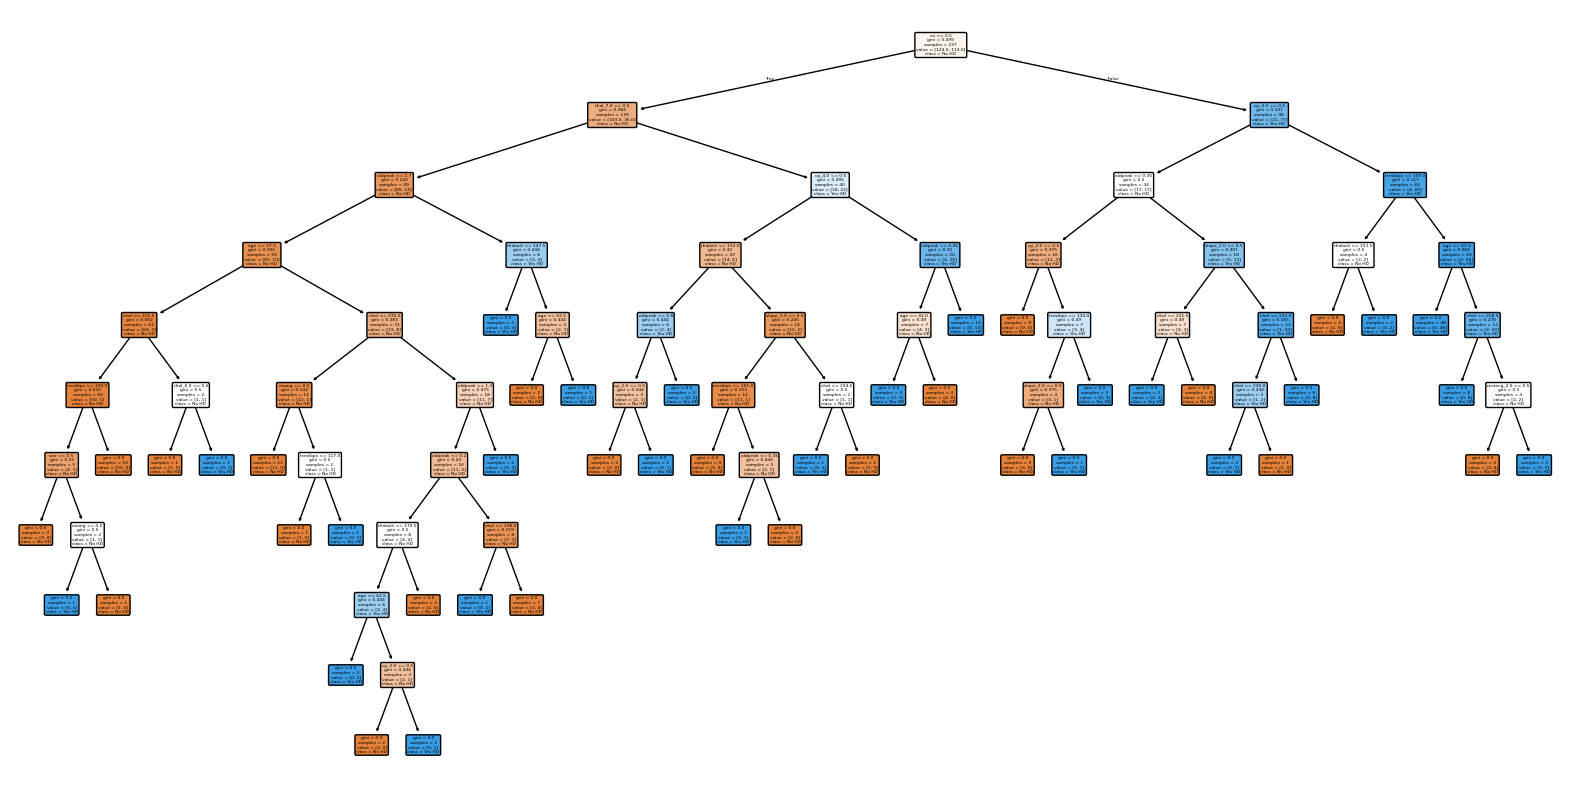

In [33]:
plt.figure(figsize=(20,10))
plot_tree(clf_dt, filled=True, rounded=True,  class_names= [ 'No HD', 'Yes HD'], feature_names=X_encoded.columns)
plt.show()

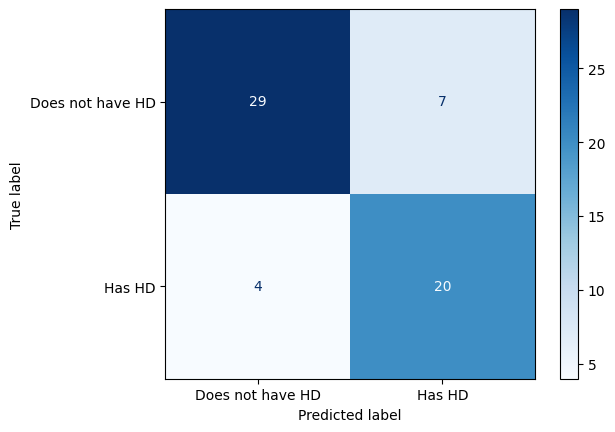

In [38]:
disp = ConfusionMatrixDisplay.from_estimator(
    estimator=clf_dt,          # Your trained classifier
    X=X_test,                  # Test features
    y=y_test,                  # True labels
    display_labels=['Does not have HD', 'Has HD'],  # Custom labels for the classes
    cmap=plt.cm.Blues          # Colormap for the confusion matrix
)

plt.show()

In [41]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Text(0.5, 1.0, 'Accuracy vs alpha for training and testing sets')

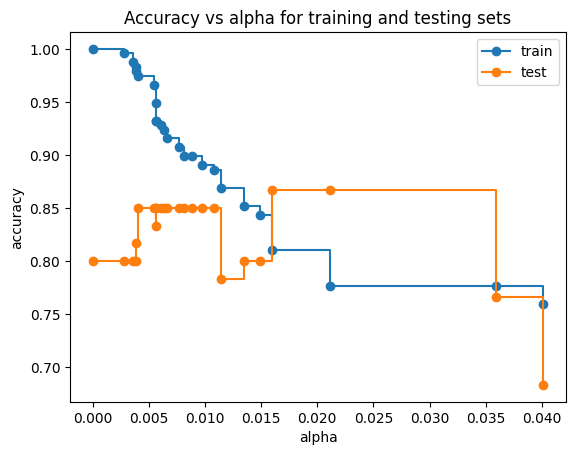

In [43]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
ax.set_title("Accuracy vs alpha for training and testing sets")

<Axes: xlabel='tree'>

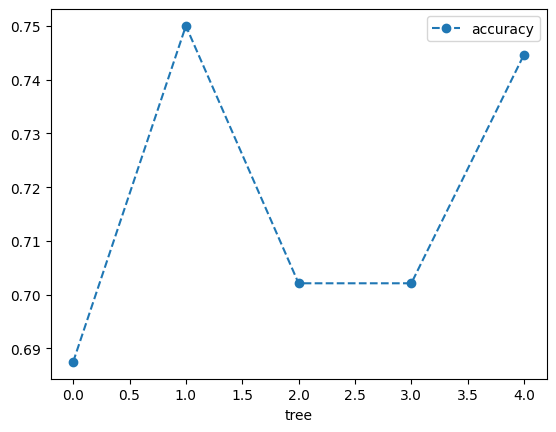

In [52]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.015)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy' : scores})
df.plot(x='tree', y='accuracy', marker= 'o', linestyle =  '--')

<Axes: xlabel='alpha'>

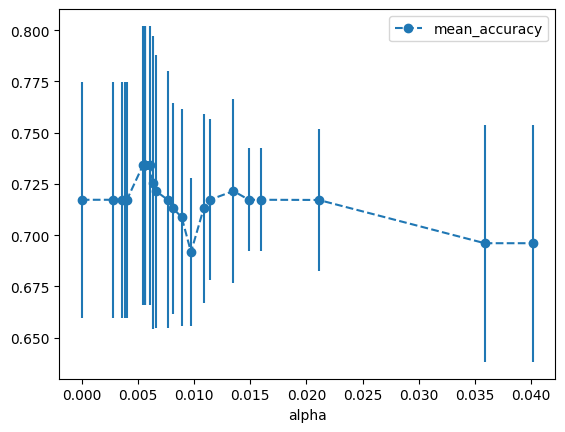

In [53]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores) ,np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std_accuracy'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std_accuracy', marker='o', linestyle='--')


In [59]:
# Filtrar alphas con desviación estándar aceptable
alpha_results_filtered = alpha_results[alpha_results['std_accuracy'] < 0.03]

alpha_results_filtered

,alpha,mean_accuracy,std_accuracy
20,0.01487,0.717287,0.025169
21,0.01594,0.717287,0.025169


In [60]:
ideal_alpha = alpha_results_filtered['alpha'].iloc[0]
ideal_alpha

0.014870358684160256

In [61]:
ideal_ccp_alpha = float(ideal_alpha)
ideal_ccp_alpha

0.014870358684160256

In [62]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned= clf_dt_pruned.fit(X_train, y_train)

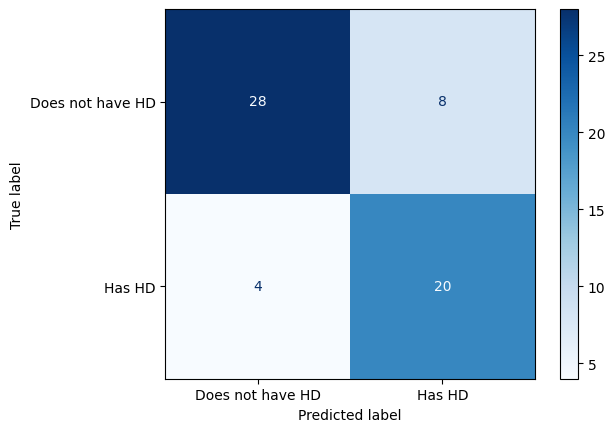

In [64]:
disp = ConfusionMatrixDisplay.from_estimator(
    estimator=clf_dt_pruned,          # Your trained classifier
    X=X_test,                  # Test features
    y=y_test,                  # True labels
    display_labels=['Does not have HD', 'Has HD'],  # Custom labels for the classes
    cmap=plt.cm.Blues          # Colormap for the confusion matrix
)

plt.show()

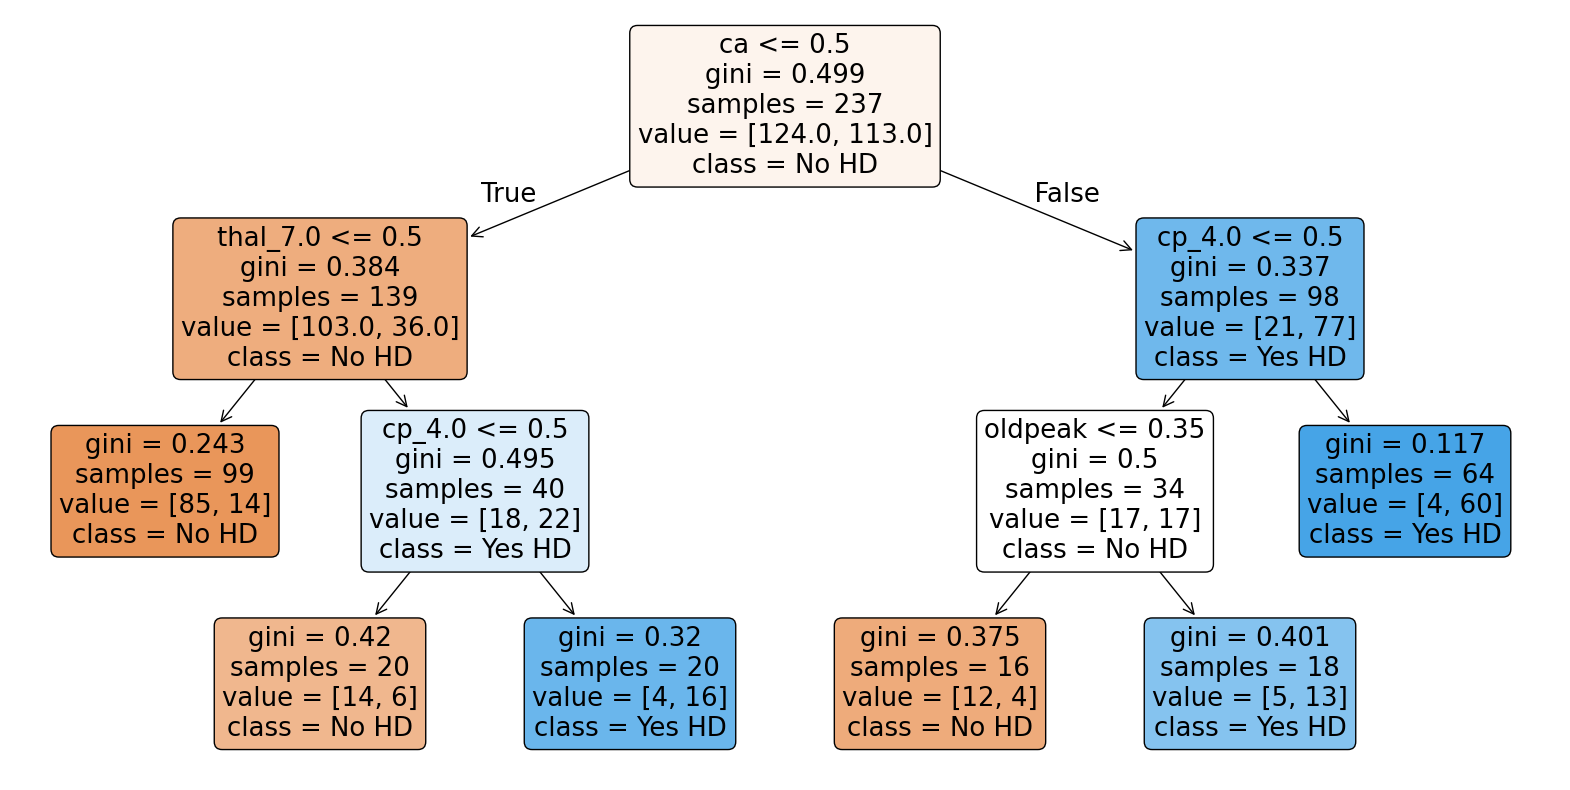

In [65]:
plt.figure(figsize=(20,10))
plot_tree(clf_dt_pruned, filled=True, rounded=True,  class_names= [ 'No HD', 'Yes HD'], feature_names=X_encoded.columns)
plt.show()